In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 27.1 MB/s eta 0:00:00


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#For EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for general use throughout the notebook.
import random
import warnings
import time
%matplotlib inline
from sklearn.model_selection import train_test_split

# to see columns properly
pd.set_option('display.max_colwidth', None)

# for build our model
import tensorflow as tf
from tensorflow.keras.layers import Add, GlobalAvgPool1D, MaxPool1D, Activation, BatchNormalization, Embedding, LSTM, Dense, Bidirectional, Input, SpatialDropout1D, Dropout, Conv1D
from tensorflow.keras import Model
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.activations import relu

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!ls

drive  sample_data


In [ ]:
dataset = pd.read_csv(r"train_with_preprocess_nolemma.csv")
dataset

,id,text,is_offensive,target,y_target_number,preprocessed_text,first_p_sec_sw,tkn_p_sw,str_tkn_p_sw
0,81c11060-a240-4d54-841b-9e2916039e85,çürük dişli,1,INSULT,0,çürük dişli,çürük dişli,"['çürük', 'dişli']",çürük dişli
1,be80ebbf-b322-4c3b-afa1-94932ea80731,Bu adamın islama ve müslümanlara verdiği zararı Gavur bile yapmaz !,1,RACIST,3,bu adamın islama ve müslümanlara verdiği zararı gavur bile yapmaz,adamın islama müslümanlara verdiği zararı gavur bile yapmaz,"['adamın', 'islama', 'müslümanlara', 'verdiği', 'zararı', 'gavur', 'bile', 'yapmaz']",adamın islama müslümanlara verdiği zararı gavur bile yapmaz
2,f99e2513-83ed-4076-ac72-b9e2cff3f049,erkekler zora gelmez,1,SEXIST,4,erkekler zora gelmez,erkekler zora gelmez,"['erkekler', 'zora', 'gelmez']",erkekler zora gelmez
3,83ed2b2e-b815-4f36-9fc4-80a9050cf2d0,Utanmazın götüne kazık sokmuşlar bu tıkırtı nereden geliyor demiş,1,PROFANITY,2,utanmazın götüne kazık sokmuşlar bu tıkırtı nereden geliyor demiş,utanmazın götüne kazık sokmuşlar tıkırtı nereden geliyor demiş,"['utanmazın', 'götüne', 'kazık', 'sokmuşlar', 'tıkırtı', 'nereden', 'geliyor', 'demiş']",utanmazın götüne kazık sokmuşlar tıkırtı nereden geliyor demiş
4,d93e05f7-bfdd-4cdb-99d8-3048761b30ff,otomasyon< sistemlerine= doğrudan bağlanabilir,0,OTHER,1,otomasyon sistemlerine doğrudan bağlanabilir,otomasyon sistemlerine doğrudan bağlanabilir,"['otomasyon', 'sistemlerine', 'doğrudan', 'bağlanabilir']",otomasyon sistemlerine doğrudan bağlanabilir
...,...,...,...,...,...,...,...,...,...
12462,71eedfa1-8fa6-425c-b982-258c3b29c003,uyuma taklidi yapan tehlikeli bir hayvanın gözüne benziyordu bu,0,OTHER,1,uyuma taklidi yapan tehlikeli bir hayvanın gözüne benziyordu bu,uyuma taklidi yapan tehlikeli hayvanın gözüne benziyordu,"['uyuma', 'taklidi', 'yapan', 'tehlikeli', 'hayvanın', 'gözüne', 'benziyordu']",uyuma taklidi yapan tehlikeli hayvanın gözüne benziyordu
12463,b38eed16-6501-4563-8b33-ff2e634bb8e5,yolda at kavga eden üç oğlan çocuğu görür,0,OTHER,1,yolda at kavga eden üç oğlan çocuğu görür,yolda at kavga eden üç oğlan çocuğu görür,"['yolda', 'at', 'kavga', 'eden', 'üç', 'oğlan', 'çocuğu', 'görür']",yolda at kavga eden üç oğlan çocuğu görür
12464,c8a051a8-94ef-4b64-a48e-54d0fa4f8323,sizin köpeklerinizin burnu bile daha iyi koku alıyor bizimkilerden,0,OTHER,1,sizin köpeklerinizin burnu bile daha iyi koku alıyor bizimkilerden,sizin köpeklerinizin burnu bile iyi koku alıyor bizimkilerden,"['sizin', 'köpeklerinizin', 'burnu', 'bile', 'iyi', 'koku', 'alıyor', 'bizimkilerden']",sizin köpeklerinizin burnu bile iyi koku alıyor bizimkilerden
12465,513a7e6d-4207-4a16-9b47-972f26e23cfe,hayalleri gerçek etmek için birisinin delilik yapması lazım diyecektir onu uyaran kasabına,0,OTHER,1,hayalleri gerçek etmek için birisinin delilik yapması lazım diyecektir onu uyaran kasabına,hayalleri gerçek etmek birisinin delilik yapması lazım diyecektir onu uyaran kasabına,"['hayalleri', 'gerçek', 'etmek', 'birisinin', 'delilik', 'yapması', 'lazım', 'diyecektir', 'onu', 'uyaran', 'kasabına']",hayalleri gerçek etmek birisinin delilik yapması lazım diyecektir onu uyaran kasabına


In [ ]:
df=dataset[[ "str_tkn_p_sw","target"]]
df

,str_tkn_p_sw,target
0,çürük dişli,INSULT
1,adamın islama müslümanlara verdiği zararı gavur bile yapmaz,RACIST
2,erkekler zora gelmez,SEXIST
3,utanmazın götüne kazık sokmuşlar tıkırtı nereden geliyor demiş,PROFANITY
4,otomasyon sistemlerine doğrudan bağlanabilir,OTHER
...,...,...
12462,uyuma taklidi yapan tehlikeli hayvanın gözüne benziyordu,OTHER
12463,yolda at kavga eden üç oğlan çocuğu görür,OTHER
12464,sizin köpeklerinizin burnu bile iyi koku alıyor bizimkilerden,OTHER
12465,hayalleri gerçek etmek birisinin delilik yapması lazım diyecektir onu uyaran kasabına,OTHER


In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("dbmdz/bert-base-turkish-128k-uncased")


In [ ]:
labels = {'INSULT':0,
          'OTHER':1,
          'PROFANITY':2,
          'RACIST':3,
          'SEXIST':4
          }

In [ ]:
import torch
import numpy as np
from transformers import BertTokenizer
class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [labels[label] for label in df['target']]
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['str_tkn_p_sw']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [ ]:
np.random.seed(112)
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42), 
                                     [int(.8*len(df)), int(.9*len(df))])

print(len(df_train),len(df_val), len(df_test))

9973 1247 1247


In [ ]:
from torch import nn
from transformers import BertModel
class BertClassifierConv1D(nn.Module):
    def __init__(self, dropout=0.5, num_classes=5):
        super(BertClassifierConv1D, self).__init__()
        
        self.bert = BertModel.from_pretrained('dbmdz/bert-base-turkish-128k-uncased', return_dict=True)
        self.conv1d = nn.Conv1d(in_channels=self.bert.config.hidden_size, out_channels=128, kernel_size=5)
        self.bilstm = nn.LSTM(input_size=128, hidden_size=64, num_layers=1, bidirectional=True, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(128, num_classes)

    def forward(self, input_id, mask):
        output = self.bert(input_ids=input_id, attention_mask=mask).last_hidden_state
        output = output.permute(0, 2, 1) # swap dimensions to prepare for Conv1d layer
        output = self.conv1d(output)
        output, _ = self.bilstm(output.transpose(1, 2))
        output = self.dropout(output)
        output = self.linear(output.mean(dim=1))
        return output



Some weights of the model checkpoint at dbmdz/bert-base-turkish-128k-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 312/312 [03:32<00:00,  1.47it/s]


Epochs: 1 | Train Loss: 0.044 | Train Accuracy: 0.527 | Val Loss: 0.036 | Val Accuracy: 0.744


100%|██████████| 312/312 [03:27<00:00,  1.51it/s]


Epochs: 2 | Train Loss: 0.028 | Train Accuracy: 0.841 | Val Loss: 0.023 | Val Accuracy: 0.881


100%|██████████| 312/312 [03:27<00:00,  1.51it/s]


Epochs: 3 | Train Loss: 0.019 | Train Accuracy: 0.903 | Val Loss: 0.017 | Val Accuracy: 0.901


100%|██████████| 312/312 [03:27<00:00,  1.51it/s]


Epochs: 4 | Train Loss: 0.015 | Train Accuracy: 0.926 | Val Loss: 0.015 | Val Accuracy: 0.911


100%|██████████| 312/312 [03:27<00:00,  1.51it/s]


Epochs: 5 | Train Loss: 0.012 | Train Accuracy: 0.941 | Val Loss: 0.013 | Val Accuracy: 0.913


100%|██████████| 312/312 [03:27<00:00,  1.51it/s]


Epochs: 6 | Train Loss: 0.010 | Train Accuracy: 0.954 | Val Loss: 0.012 | Val Accuracy: 0.922


100%|██████████| 312/312 [03:27<00:00,  1.51it/s]


Epochs: 7 | Train Loss: 0.009 | Train Accuracy: 0.964 | Val Loss: 0.012 | Val Accuracy: 0.915


100%|██████████| 312/312 [03:27<00:00,  1.51it/s]


Epochs: 8 | Train Loss: 0.008 | Train Accuracy: 0.971 | Val Loss: 0.011 | Val Accuracy: 0.921


100%|██████████| 312/312 [03:27<00:00,  1.51it/s]


Epochs: 9 | Train Loss: 0.007 | Train Accuracy: 0.977 | Val Loss: 0.011 | Val Accuracy: 0.921


100%|██████████| 312/312 [03:27<00:00,  1.51it/s]


Epochs: 10 | Train Loss: 0.006 | Train Accuracy: 0.982 | Val Loss: 0.010 | Val Accuracy: 0.923


100%|██████████| 312/312 [03:27<00:00,  1.51it/s]


Epochs: 11 | Train Loss: 0.005 | Train Accuracy: 0.985 | Val Loss: 0.010 | Val Accuracy: 0.926


100%|██████████| 312/312 [03:27<00:00,  1.51it/s]


Epochs: 12 | Train Loss: 0.005 | Train Accuracy: 0.985 | Val Loss: 0.010 | Val Accuracy: 0.917


100%|██████████| 312/312 [03:27<00:00,  1.51it/s]


Epochs: 13 | Train Loss: 0.004 | Train Accuracy: 0.988 | Val Loss: 0.010 | Val Accuracy: 0.914


100%|██████████| 312/312 [03:27<00:00,  1.51it/s]


Epochs: 14 | Train Loss: 0.004 | Train Accuracy: 0.990 | Val Loss: 0.010 | Val Accuracy: 0.917
Early stopping at epoch 14


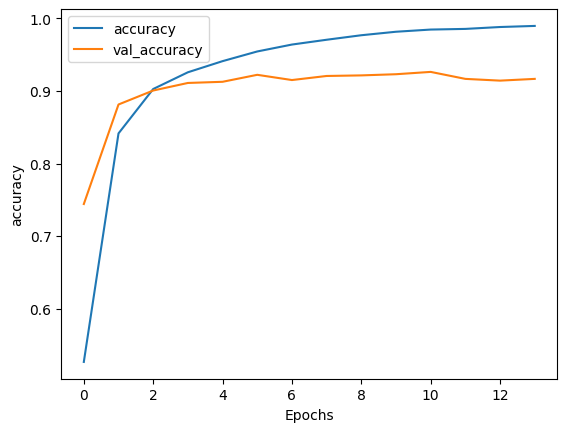

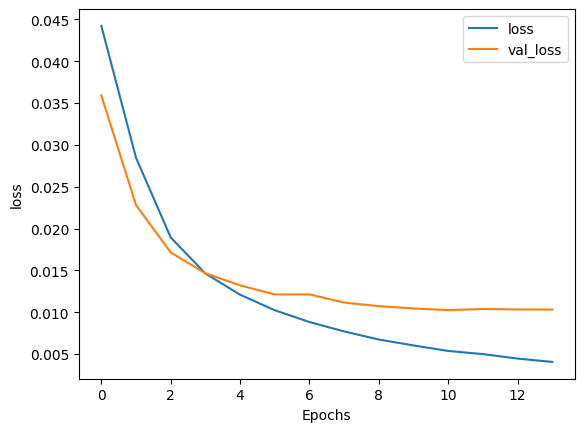

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.optim import Adam
from tqdm import tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau

def plot_graphs(history, string):
    plt.plot(history[string])
    plt.plot(history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

def train(model, train_data, val_data, learning_rate, epochs,patience=3):

    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=32)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:
        model = model.cuda()
        criterion = criterion.cuda()

    history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}
    best_val_loss = float('inf')
    counter = 0
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.1, verbose=True, cooldown=0)

    for epoch_num in range(epochs):

        total_acc_train = 0
        total_loss_train = 0

        for train_input, train_label in tqdm(train_dataloader):

            train_label = train_label.to(device)
            mask = train_input['attention_mask'].to(device)
            input_id = train_input['input_ids'].squeeze(1).to(device)

            output = model(input_id, mask)
            
            batch_loss = criterion(output, train_label.long())
            total_loss_train += batch_loss.item()
            
            acc = (output.argmax(dim=1) == train_label).sum().item()
            total_acc_train += acc

            model.zero_grad()
            batch_loss.backward()
            optimizer.step()
        
        total_acc_val = 0
        total_loss_val = 0

        with torch.no_grad():

            for val_input, val_label in val_dataloader:

                val_label = val_label.to(device)
                mask = val_input['attention_mask'].to(device)
                input_id = val_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)

                batch_loss = criterion(output, val_label.long())
                total_loss_val += batch_loss.item()
                
                acc = (output.argmax(dim=1) == val_label).sum().item()
                total_acc_val += acc
        
        train_loss = total_loss_train / len(train_data)
        train_acc = total_acc_train / len(train_data)
        val_loss = total_loss_val / len(val_data)
        val_acc = total_acc_val / len(val_data)
        history['loss'].append(train_loss)
        history['accuracy'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_accuracy'].append(val_acc)
        print(f'Epochs: {epoch_num + 1} | Train Loss: {train_loss:.3f} | Train Accuracy: {train_acc:.3f} | Val Loss: {val_loss:.3f} | Val Accuracy: {val_acc:.3f}')
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print(f'Early stopping at epoch {epoch_num+1}')
                break
        scheduler.step(val_loss)

    plot_graphs(history, "accuracy")
    plot_graphs(history, "loss")
EPOCHS = 15
model = BertClassifierConv1D()
LR = 1e-6
              
train(model, df_train, df_val, LR, EPOCHS)

In [ ]:
!pip install datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 KB 10.4 MB/s eta 0:00:00


In [ ]:
import time
from datetime import datetime

now = datetime.now()
seed = int(now.strftime("%Y%m%d%H%M%S"))  # daily
print(seed)
random.seed(seed)
random_time=random.randint(0, 350)
model_path= 'model_weights'+str(random_time)+".pth"
torch.save(model.state_dict(), model_path)
print(model_path)

20230404022018
model_weights86.pth


In [ ]:
def evaluate(model, test_data):

    test = Dataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=32)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    output_indices = []
    test_labels=[]
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

              test_label = test_label.to(device)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)

              output = model(input_id, mask)
             
              acc = (output.argmax(dim=1) == test_label).sum().item()
              total_acc_test += acc

              batch_indices = output.argmax(dim=1).tolist()
              output_indices.extend(batch_indices)
              test_labels.extend(test_label)

    
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')
    return output_indices, test_labels
y_pred,y_test=evaluate(model, df_test)

Test Accuracy:  0.925


In [ ]:
y_pred_tensor = torch.tensor(y_pred)
y_test_tensor = torch.tensor(y_test)

In [ ]:
print(classification_report(np.array(y_pred_tensor.cpu()), np.array(y_test_tensor.cpu()), output_dict=True))

{'0': {'precision': 0.8508064516129032, 'recall': 0.871900826446281, 'f1-score': 0.8612244897959183, 'support': 242}, '1': {'precision': 0.9473684210526315, 'recall': 0.9243243243243243, 'f1-score': 0.935704514363885, 'support': 370}, '2': {'precision': 0.9071729957805907, 'recall': 0.9598214285714286, 'f1-score': 0.9327548806941431, 'support': 224}, '3': {'precision': 0.9731182795698925, 'recall': 0.9476439790575916, 'f1-score': 0.9602122015915119, 'support': 191}, '4': {'precision': 0.9534883720930233, 'recall': 0.9318181818181818, 'f1-score': 0.942528735632184, 'support': 220}, 'accuracy': 0.92542101042502, 'macro avg': {'precision': 0.9263909040218083, 'recall': 0.9271017480435615, 'f1-score': 0.9264849644155284, 'support': 1247}, 'weighted avg': {'precision': 0.9264324469871397, 'recall': 0.92542101042502, 'f1-score': 0.925678382088049, 'support': 1247}}


In [ ]:
from sklearn.metrics import f1_score
f1_score(np.array(y_test_tensor.cpu()),np.array(y_pred_tensor.cpu()), average='macro')

0.9264849644155284

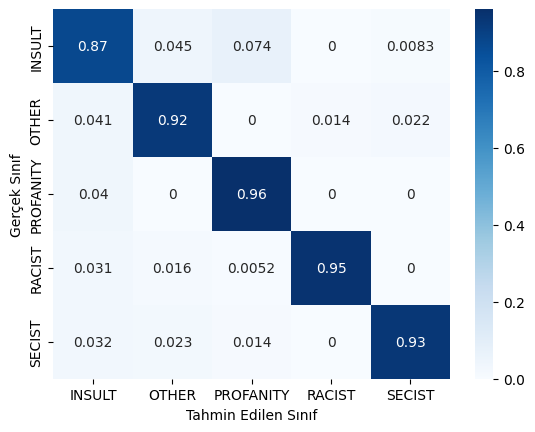

In [ ]:
def conf_matrix(y_test,y_pred):
  cm = confusion_matrix(y_test,y_pred, normalize="true")
  sns.heatmap(cm, annot=True, cmap="Blues",xticklabels=["INSULT","OTHER","PROFANITY","RACIST","SECIST"],yticklabels=["INSULT","OTHER","PROFANITY","RACIST","SECIST"] )
  plt.xlabel('Tahmin Edilen Sınıf')
  plt.ylabel('Gerçek Sınıf')
  plt.show()
conf_matrix(np.array(y_pred_tensor.cpu()), np.array(y_test_tensor.cpu()))